In [1]:
# Instalação de bibliotecas necessárias
!pip install -U scikit-learn scipy ydata-profiling

# Importando Bibliotecas Necessárias
import numpy as np
import pandas
from sklearn import tree
import graphviz
import os
import seaborn as sns; sns.set()
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest, chi2, f_classif, SelectFromModel, RFE
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import normalize, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier, plot_tree, plot_importance
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Configuração para exibição de gráficos interativos
init_notebook_mode(connected=True)
%matplotlib inline


  Using cached scipy-1.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)


In [2]:
# dataset: https://www.kaggle.com/competitions/playground-series-s4e8/data?select=train.csv
dataset = pandas.read_csv('/content/sample_data/train.csv')
dataset.sample(3)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
1971486,1971486,p,7.34,x,y,w,t,NaN,NaN,g,...,s,NaN,w,NaN,NaN,t,l,NaN,g,u
285218,285218,p,1.74,f,i,k,f,a,NaN,p,...,NaN,NaN,w,NaN,NaN,f,f,p,g,u
2234609,2234609,e,1.41,p,g,g,f,NaN,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u


In [3]:
dataset.sample(9)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
1163055,1163055,e,10.51,p,y,w,f,e,c,w,...,NaN,s,w,NaN,NaN,t,e,NaN,g,a
2119597,2119597,p,7.60,b,y,n,f,NaN,NaN,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1714658,1714658,p,7.39,x,s,n,f,s,NaN,g,...,NaN,y,n,NaN,NaN,f,f,NaN,d,w
2212976,2212976,p,6.10,x,g,n,f,e,NaN,w,...,NaN,y,w,u,w,t,p,NaN,d,u
2828225,2828225,p,2.78,x,i,e,f,NaN,NaN,e,...,NaN,NaN,e,NaN,NaN,f,f,n,d,a
2749867,2749867,e,7.91,f,NaN,g,f,s,c,g,...,b,NaN,u,NaN,NaN,f,f,NaN,g,a
2632812,2632812,e,5.75,f,s,n,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
1014725,1014725,p,5.30,s,NaN,n,t,d,c,p,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
991977,991977,p,1.24,s,s,y,f,f,f,f,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a


In [4]:
#Preencher NaN
dataset['cap-diameter'] = dataset['cap-diameter'].fillna(-1)
dataset['cap-shape'] = dataset['cap-shape'].fillna('Unknown')
dataset['cap-surface'] = dataset['cap-surface'].fillna('Unknown')
dataset['cap-color'] = dataset['cap-color'].fillna('Unknown')
dataset['does-bruise-or-bleed'] = dataset['does-bruise-or-bleed'].fillna('Unknown')
dataset['gill-attachment'] = dataset['gill-attachment'].fillna('Unknown')
dataset['gill-spacing'] = dataset['gill-spacing'].fillna('Unknown')
dataset['gill-color'] = dataset['gill-color'].fillna('Unknown')
dataset['stem-height'] = dataset['stem-height'].fillna(-1)
dataset['stem-width'] = dataset['stem-width'].fillna(-1)
dataset['stem-root'] = dataset['stem-root'].fillna('Unknown')
dataset['stem-surface'] = dataset['stem-surface'].fillna('Unknown')
dataset['stem-color'] = dataset['stem-color'].fillna('Unknown')
dataset['veil-type'] = dataset['veil-type'].fillna('Unknown')
dataset['veil-color'] = dataset['veil-color'].fillna('Unknown')
dataset['has-ring'] = dataset['has-ring'].fillna('Unknown')
dataset['ring-type'] = dataset['ring-type'].fillna('Unknown')
dataset['spore-print-color'] = dataset['spore-print-color'].fillna('Unknown')
dataset['habitat'] = dataset['habitat'].fillna('Unknown')
dataset['season'] = dataset['season'].fillna('Unknown')

In [5]:
label_encoder = LabelEncoder()
# dataset['class'] = label_encoder.fit_transform(dataset['class'])

In [6]:
for column in dataset.columns:
    if column not in ["cap-diameter", "stem-height", "stem-width"]:
        dataset[column] = label_encoder.fit_transform(dataset[column])

In [7]:
dataset.drop("id", axis=1, inplace=True)

In [8]:
dataset.sample(9)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
1567828,0,8.95,72,73,73,9,45,29,60,4.59,...,14,29,56,2,3,6,19,7,26,0
1935946,0,3.17,54,48,64,21,48,29,49,2.72,...,14,29,47,2,3,6,19,7,26,0
302402,1,5.58,72,57,65,9,45,29,47,5.23,...,14,59,48,2,3,19,40,7,26,3
1545104,0,3.97,64,42,64,9,54,35,37,5.84,...,14,29,47,2,3,6,19,7,26,0
2235749,0,8.21,54,73,64,9,71,29,60,6.33,...,16,44,56,2,3,6,19,7,30,2
1167314,1,2.27,72,56,56,9,45,26,60,5.99,...,14,29,47,2,3,6,19,7,26,2
1204487,1,5.34,54,65,64,9,45,29,62,6.11,...,14,44,47,2,3,19,10,7,26,0
171400,1,8.43,54,82,77,9,71,29,62,7.38,...,14,59,55,2,3,6,19,7,26,0
1749507,0,6.07,72,82,64,9,53,29,47,4.49,...,14,29,56,2,3,19,24,7,49,0


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 int64  
 1   cap-diameter          float64
 2   cap-shape             int64  
 3   cap-surface           int64  
 4   cap-color             int64  
 5   does-bruise-or-bleed  int64  
 6   gill-attachment       int64  
 7   gill-spacing          int64  
 8   gill-color            int64  
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             int64  
 12  stem-surface          int64  
 13  stem-color            int64  
 14  veil-type             int64  
 15  veil-color            int64  
 16  has-ring              int64  
 17  ring-type             int64  
 18  spore-print-color     int64  
 19  habitat               int64  
 20  season                int64  
dtypes: float64(3), int64(18)
memory usage: 499.4 MB


In [34]:
analysis_dataset = pandas.read_csv('/content/sample_data/train.csv')

In [35]:
analysis_dataset.drop("id", axis=1, inplace=True)

In [31]:
#analysis_dataset = analysis_dataset.sample(100)

Categorical variables:
['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']


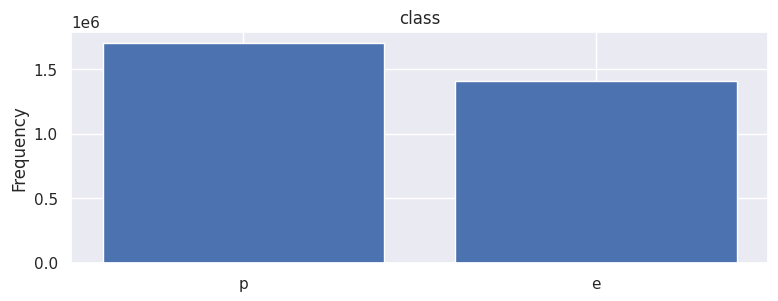

class:
class
p    1705396
e    1411549
Name: count, dtype: int64


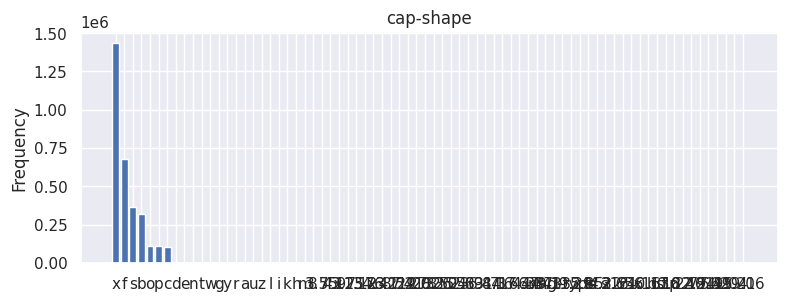

cap-shape:
cap-shape
x        1436026
f         676238
s         365146
b         318646
o         108835
          ...   
12.62          1
5.15           1
19.04          1
49.21          1
19.06          1
Name: count, Length: 74, dtype: int64


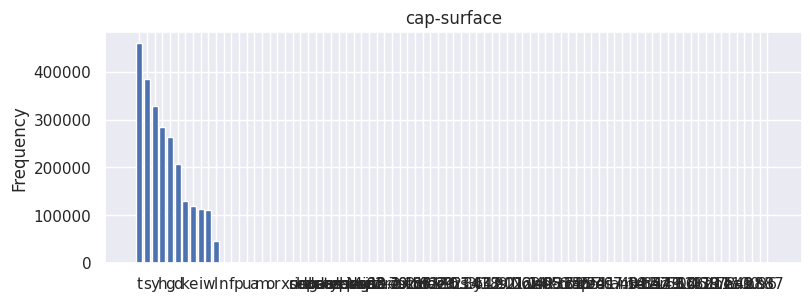

cap-surface:
cap-surface
t        460777
s        384970
y        327826
h        284460
g        263729
          ...  
1.42          1
has h         1
10.83         1
8.96          1
0.87          1
Name: count, Length: 83, dtype: int64


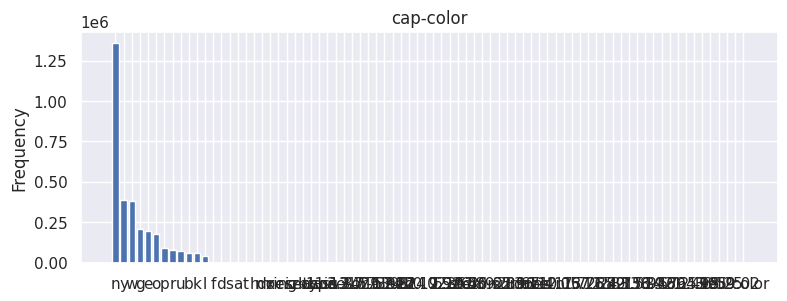

cap-color:
cap-color
n             1359542
y              386627
w              379442
g              210825
e              197290
               ...   
3.95                1
6.59                1
5.25                1
veil-color          1
9.02                1
Name: count, Length: 78, dtype: int64


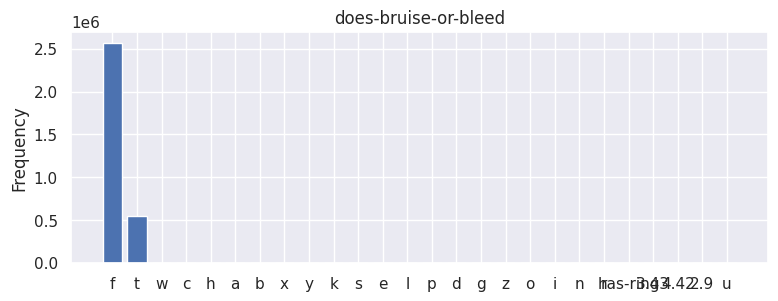

does-bruise-or-bleed:
does-bruise-or-bleed
f           2569743
t            547085
w                14
c                11
h                 9
a                 7
b                 7
x                 7
y                 7
k                 6
s                 6
e                 4
l                 4
p                 4
d                 4
g                 3
z                 3
o                 3
i                 2
n                 2
r                 1
has-ring          1
3.43              1
4.42              1
2.9               1
u                 1
Name: count, dtype: int64


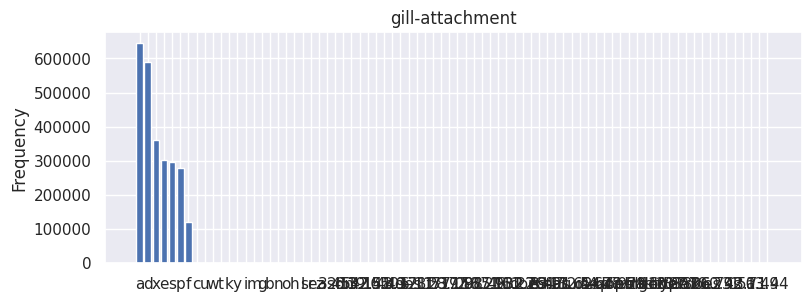

gill-attachment:
gill-attachment
a        646034
d        589236
x        360878
e        301858
s        295439
          ...  
1             1
is a          1
3.71          1
50.44         1
13.94         1
Name: count, Length: 78, dtype: int64


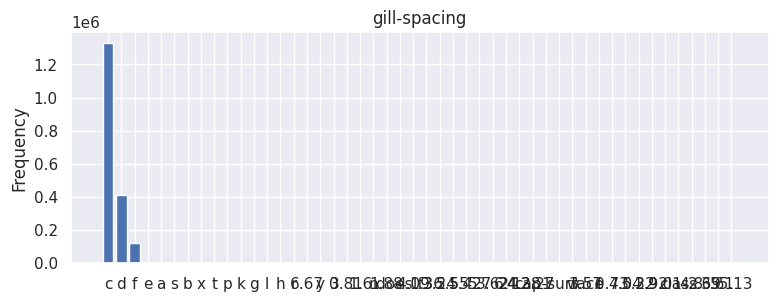

gill-spacing:
gill-spacing
c              1331054
d               407932
f               119380
e                   24
a                   17
s                   16
b                   12
x                    8
t                    8
p                    7
k                    4
g                    4
l                    3
h                    3
r                    2
6.67                 2
y                    2
0                    2
3.81                 1
1.6                  1
n                    1
1.88                 1
does f               1
4.09                 1
1.36                 1
3.24                 1
5.55                 1
5.42                 1
5.7                  1
3.62                 1
6.4                  1
24.38                1
12.27                1
1                    1
cap-surface          1
w                    1
3.57                 1
i                    1
0.73                 1
4.04                 1
5.22                 1
3.92                 1
9.01   

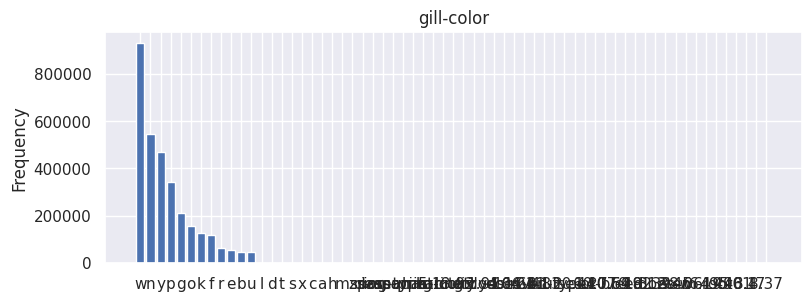

gill-color:
gill-color
w       931538
n       543386
y       469464
p       343626
g       212164
         ...  
9.46         1
5.01         1
3.4          1
17           1
8.37         1
Name: count, Length: 63, dtype: int64


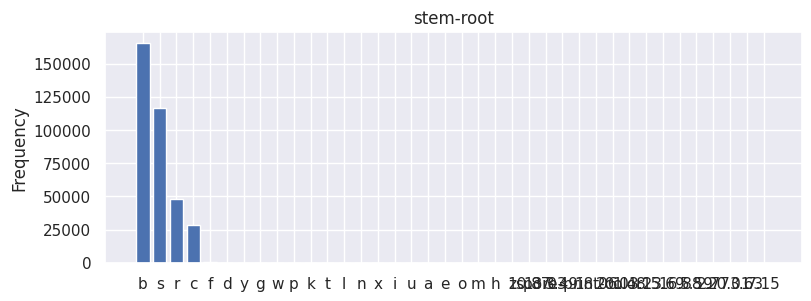

stem-root:
stem-root
b                    165801
s                    116946
r                     47803
c                     28592
f                       597
d                        24
y                        14
g                        12
w                        12
p                        12
k                        11
t                        10
l                        10
n                        10
x                         9
i                         8
u                         8
a                         7
e                         6
o                         5
m                         4
h                         4
z                         2
10.87                     1
13.03                     1
3.49                      1
spore-print-color         1
18.06                     1
20.0                      1
1.48                      1
3.23                      1
15.69                     1
16.88                     1
5.59                      1
2.77                      1

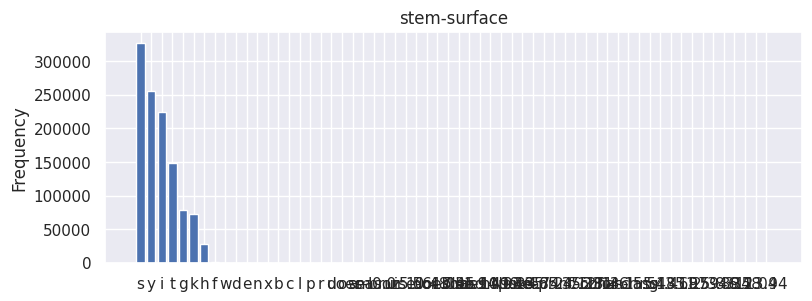

stem-surface:
stem-surface
s                       327610
y                       255500
i                       224346
t                       147974
g                        78080
k                        73383
h                        28283
f                          512
w                           49
d                           48
e                           36
n                           34
x                           26
b                           23
c                           22
l                           20
p                           20
r                           20
u                           16
o                           15
a                           11
m                            7
season                       6
0.0                          3
z                            2
does-bruise-or-bleed         2
5.56                         2
10.48                        2
does s                       1
1.03                         1
7.45                         1
has h       

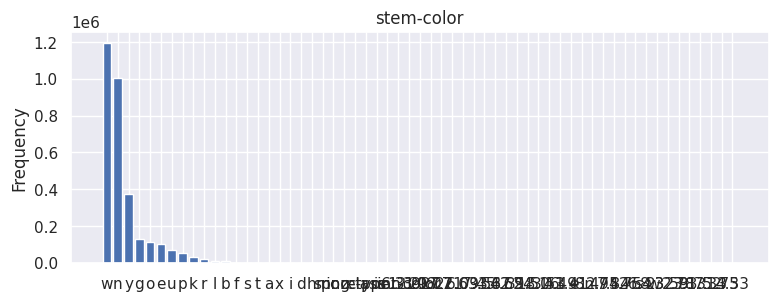

stem-color:
stem-color
w                    1196637
n                    1003464
y                     373971
g                     132019
o                     111541
e                     103373
u                      67017
p                      54690
k                      33676
r                      22329
l                       9994
b                       7365
f                        573
s                         51
t                         40
a                         36
x                         20
i                         19
d                         16
h                         12
m                         11
c                          7
z                          6
ring-type                  3
class                      2
spore-print-color          2
is n                       1
6.31                       1
12.92                      1
3.98                       1
20.07                      1
7.7                        1
22.6                       1
6.09                

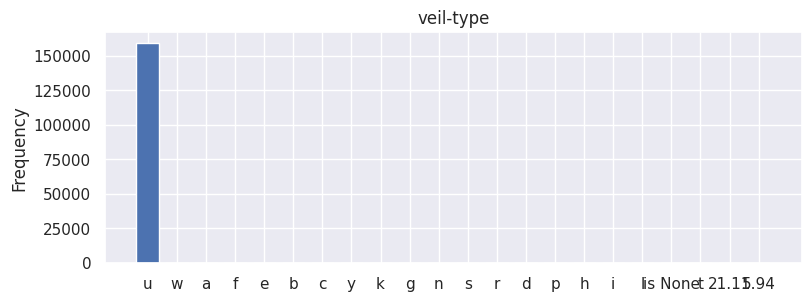

veil-type:
veil-type
u          159373
w              11
a               9
f               8
e               8
b               5
c               5
y               4
k               4
g               4
n               3
s               3
r               2
d               2
p               2
h               2
i               2
l               1
is None         1
t               1
21.11           1
5.94            1
Name: count, dtype: int64


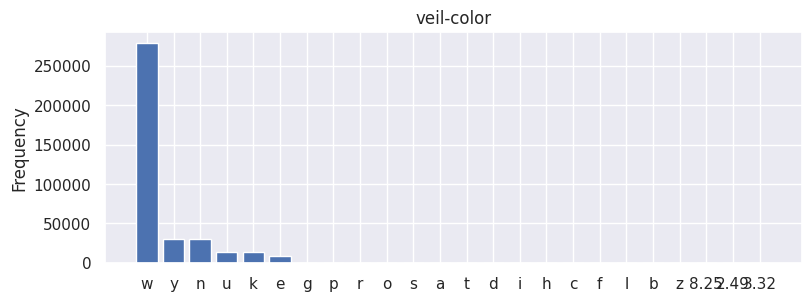

veil-color:
veil-color
w       279070
y        30473
n        30039
u        14026
k        13080
e         9169
g           30
p           23
r           14
o           13
s           11
a            7
t            7
d            6
i            6
h            5
c            4
f            4
l            4
b            3
z            1
8.25         1
2.49         1
3.32         1
Name: count, dtype: int64


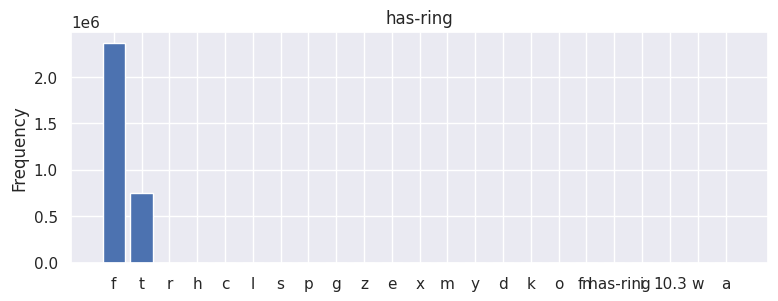

has-ring:
has-ring
f             2368820
t              747982
r                  16
h                  13
c                  11
l                  11
s                  11
p                  11
g                   8
z                   6
e                   6
x                   5
m                   4
y                   3
d                   3
k                   2
o                   2
n                   2
f has-ring          1
i                   1
10.3                1
w                   1
a                   1
Name: count, dtype: int64


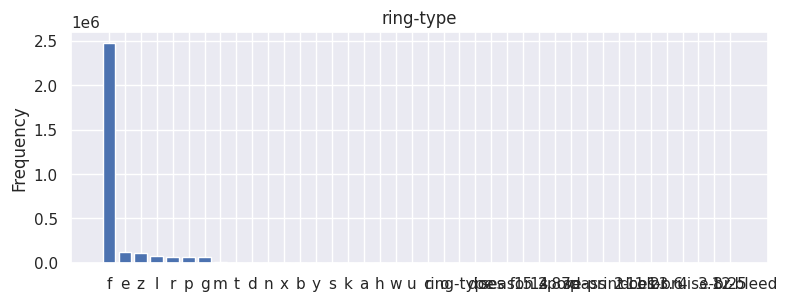

ring-type:
ring-type
f                       2477170
e                        120006
z                        113780
l                         73443
r                         67909
p                         67678
g                         63687
m                          3992
t                            98
d                            37
n                            34
x                            32
b                            29
y                            25
s                            18
k                            18
a                            16
h                            15
w                            14
u                            13
c                            11
o                             9
ring-type                     7
i                             4
does f                        3
season                        3
15                            1
14                            1
2.87                          1
sp                            1
class              

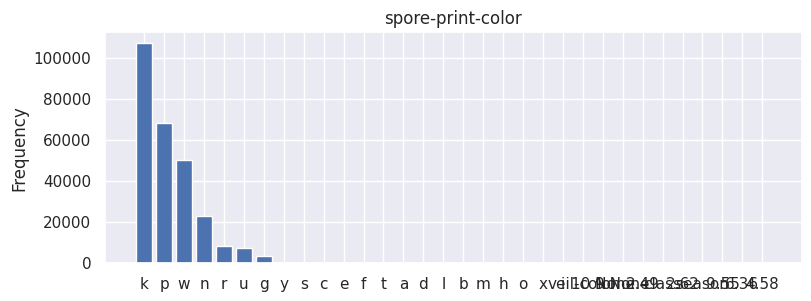

spore-print-color:
spore-print-color
k             107310
p              68237
w              50173
n              22646
r               7975
u               7256
g               3492
y                 36
s                 21
c                 16
e                 14
f                 14
t                 13
a                 13
d                  9
l                  8
b                  5
m                  4
h                  3
o                  3
x                  2
i                  2
veil-color         2
10 None            1
9 None             1
2.49               1
class              1
2.62               1
season             1
9.55               1
6.36               1
4.58               1
Name: count, dtype: int64


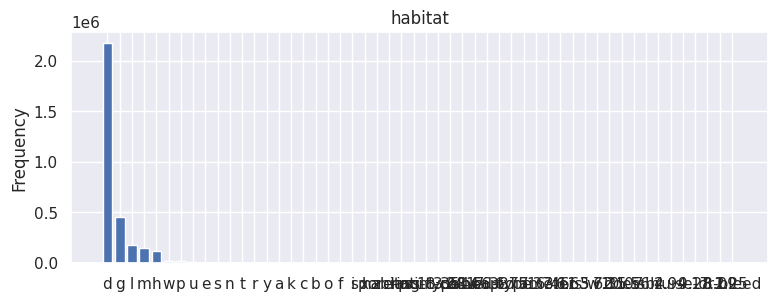

habitat:
habitat
d                       2177573
g                        454908
l                        171892
m                        150969
h                        120137
w                         18530
p                         17180
u                          5264
e                            55
s                            52
n                            41
t                            40
r                            38
y                            34
a                            34
k                            31
c                            26
b                            18
o                            12
f                            11
i                             7
x                             5
z                             5
habitat                       5
class                         3
spore-print-color             3
ring-type                     2
18.35                         1
3.68                          1
2.44                          1
1.66                   

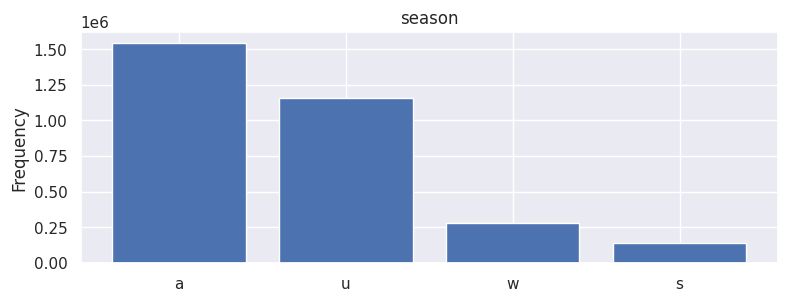

season:
season
a    1543321
u    1153588
w     278189
s     141847
Name: count, dtype: int64


In [36]:
# %% [code]
def bar_plot(variable):
    # get feature
    var = analysis_dataset[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

# %% [code]
# categorical = (dataset.dtypes == "object")
# categorical_list = list(categorical[categorical].index)

## ou colocar diretamente, CASO SEJA OUTRO DATASET PODES COLOCAR DIRETO AQUI O ROTULO DA CLASSE DESEJADA
categorical_list = []
numerical_list = ["cap-diameter", "stem-height", "stem-width"]
for column in analysis_dataset.columns:
    if column not in numerical_list:
        categorical_list.append(column)

# imprime a lista de variaveis categoricas (uma neste caso, a categoria da flor)
print("Categorical variables:")
print(categorical_list)

# %% [code]
#apresenta um gráfico de barra com o número de amostras de cada categoria)
sns.set_style('darkgrid')
for c in categorical_list:
    bar_plot(c)

In [14]:
# Veil-type não contém informações relevantes sobre o problema pois contém apenas valores null e uniformes, dessa forma, pode ser removida
dataset.drop("veil-type", axis=1, inplace=True)

KeyError: "['veil-type'] not found in axis"

Numerical variables:
['cap-diameter', 'stem-height', 'stem-width']


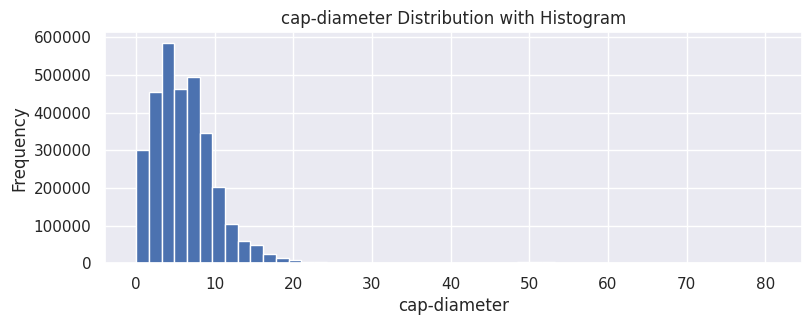

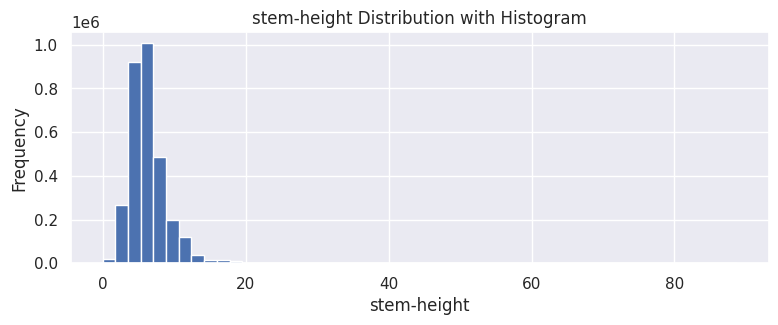

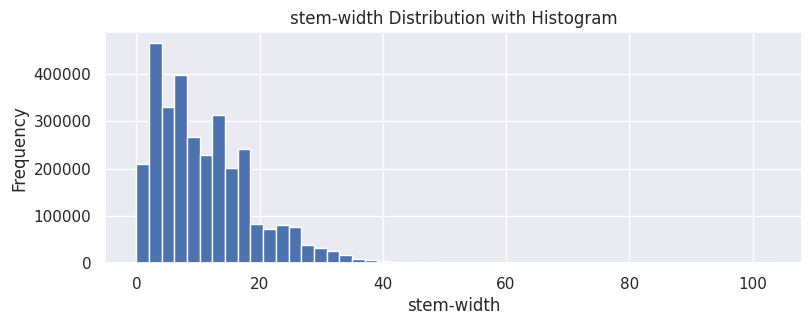

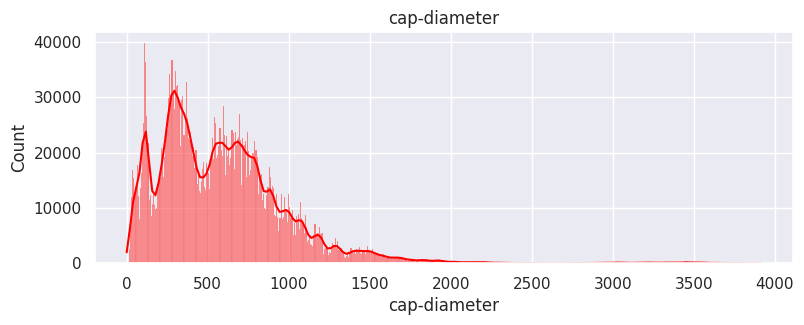

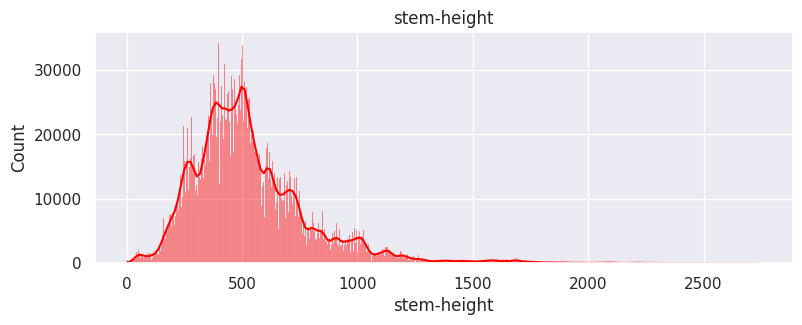

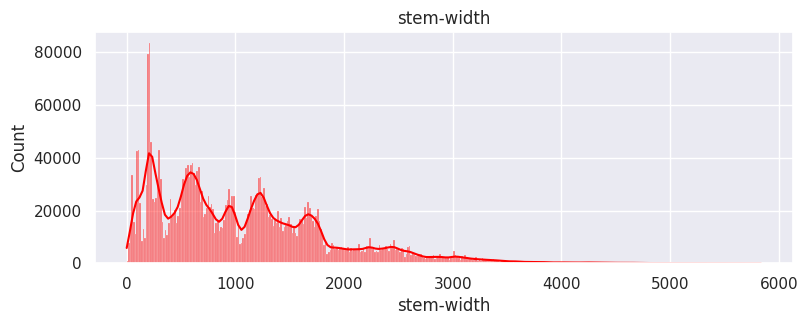

In [38]:
# %% [code]
#colunas = dataset.columns.tolist()
#numerical_list = [col for col in colunas if col not in categorical_list]

# print("Todas variaveis:")
# print(numerical_list)

#recupera as variáveis numéricas (as 4 largura e comprimento da petala e talo)
#numerical_float64 = (dataset.dtypes == "float64")
#numerical_float64_list = list(numerical_float64[numerical_float64].index)

#print("Numerical float64 variables:")
#print(numerical_float64_list)


# Lista as colunas do DataFrame
#colunas = dataset.columns.tolist()
#numerical_list = [col for col in colunas if col not in categorical_list]

print("Numerical variables:")
print(numerical_list)







# %% [code]
#define funcao grafico do histograma (quantas amostras de cada valor)
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    try:
        plt.hist(analysis_dataset[variable], bins = 50)
    except TypeError:
        return
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()



# %% [code]
#imprime o histoggrama para cada variável numérica, usando funcao de histograma da biblioteca plot
for n in numerical_list:
    plot_hist(n)

# %% [code]
#imprime o histoggrama para cada variável numérica, usando funcao de histograma da biblioteca sns
for n in numerical_list:
  plt.figure(figsize = (9,3))
  sns.histplot(dataset[n], color = 'red', kde = True).set_title(n)


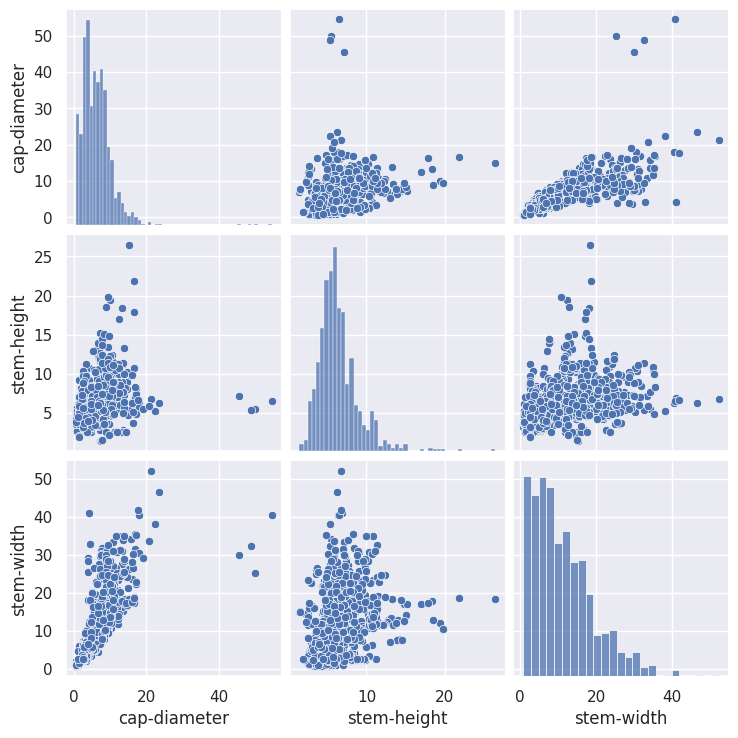

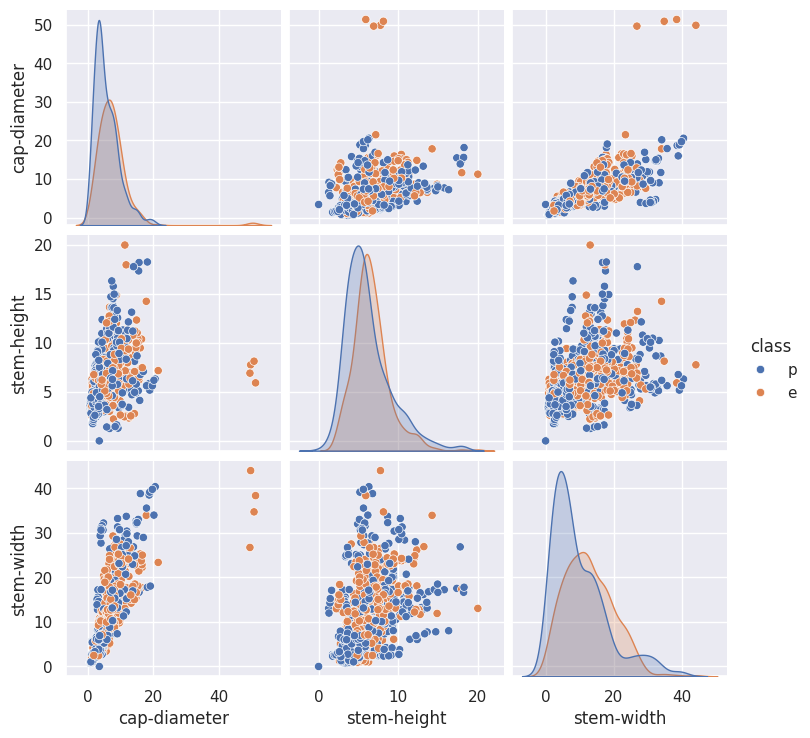

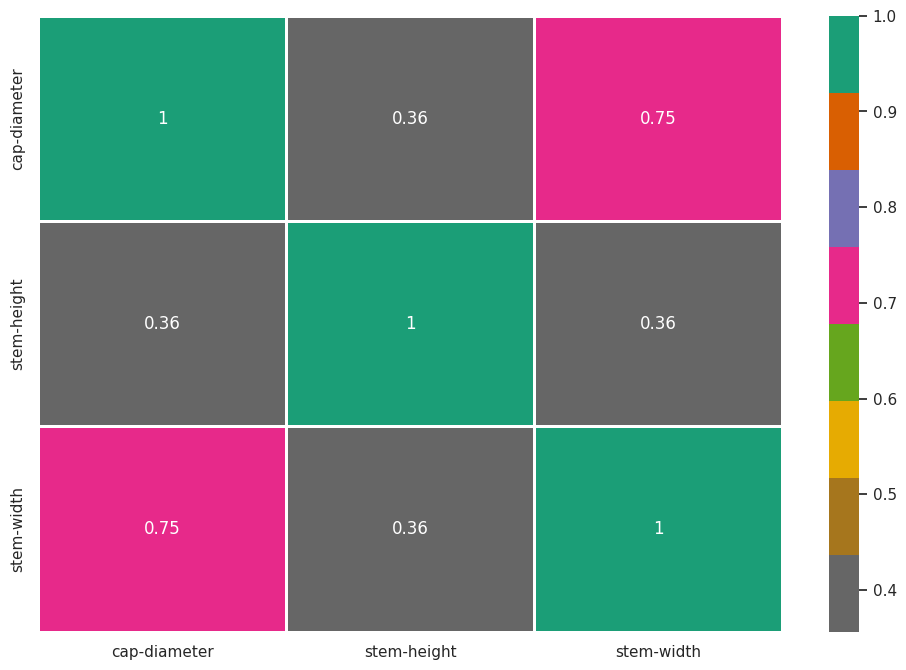

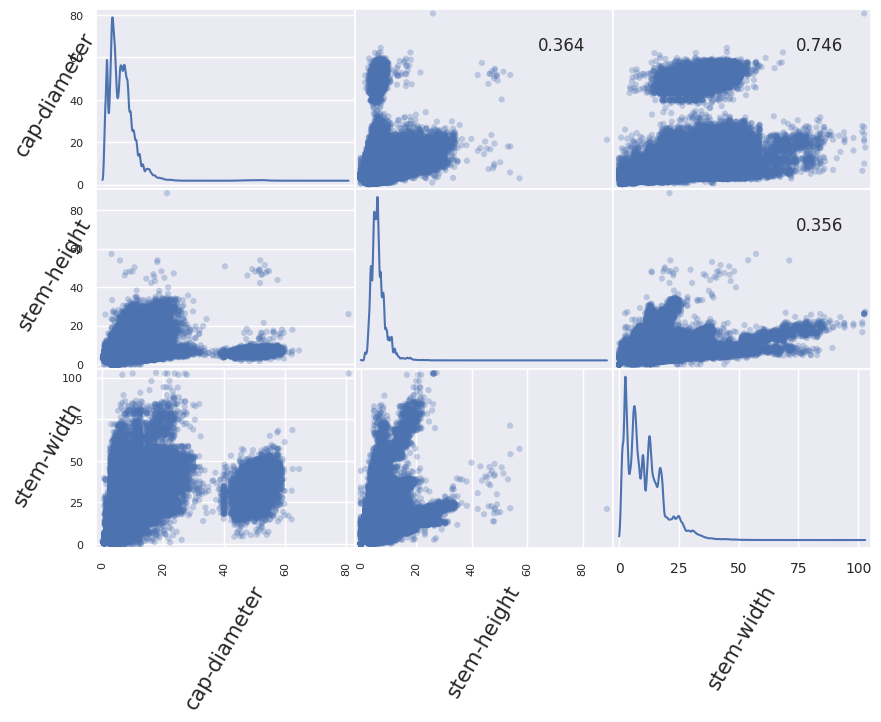

In [41]:
# %% [code]
#utiliza a biblioteca sns para fornecer gráficos de dispersão (scatter plots) para cada par de variáveis em um dataset.
# ajuda a visualizar relações entre várias variáveis de maneira eficiente.
features = analysis_dataset.columns
sns.set_style('darkgrid')
sns.pairplot(analysis_dataset[features].sample(1000))

# %% [code]
# igual ao anterior, exceto que coluna 'Species' é usada para diferenciar os pontos nos gráficos por cor,
# facilitando a visualização das diferentes categorias.
# CASO SEJA OUTRO DATASET trocar 'species' pelo rótulo da classe desejada do dataset
sns.pairplot(analysis_dataset.sample(1000), hue = 'class')


#apresenta um mapa de calor da correlacao, considerando apenas as vairaveis numericas do dataset (features)
# %% [code]
plt.figure(figsize=(12,8))
sns.heatmap(analysis_dataset.corr(numeric_only=True), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

#utiliza o pandas para fornecer também gráficos de dispersão (semelhantes aos mesmos graficos do sns)
# %% [code]
sns.set_style('darkgrid')
axes = pandas.plotting.scatter_matrix(analysis_dataset, alpha = 0.3, figsize = (10,7), diagonal = 'kde' ,s=80)
corr = analysis_dataset.corr(numeric_only=True).values

plt.xticks(fontsize =10,rotation =0)
plt.yticks(fontsize =10)
for ax in axes.ravel():
    ax.set_xlabel(ax.get_xlabel(),fontsize = 15, rotation = 60)
    ax.set_ylabel(ax.get_ylabel(),fontsize = 15, rotation = 60)
# put the correlation between each pair of variables on each graph
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i, j], (0.8, 0.8), xycoords="axes fraction", ha="center", va="center")


##############         Bar Plot         #################



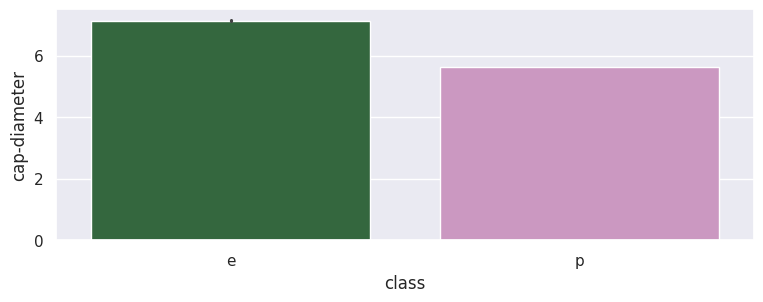

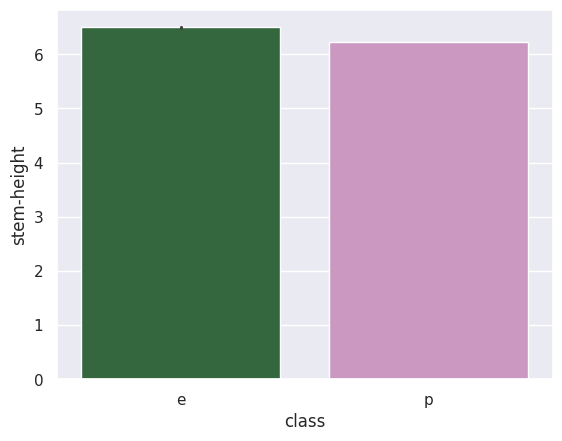

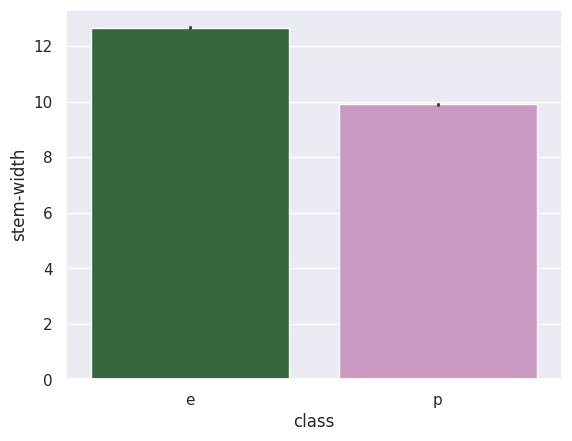


##############         Violin Plot         #################



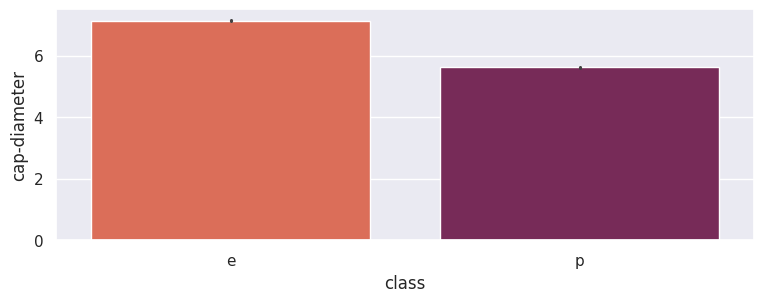

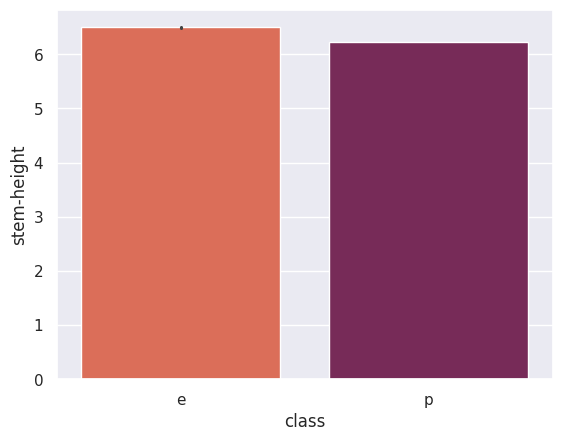

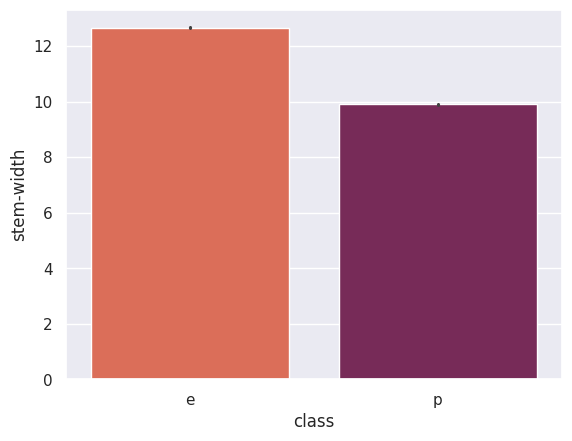


##############         Violin Plot         #################



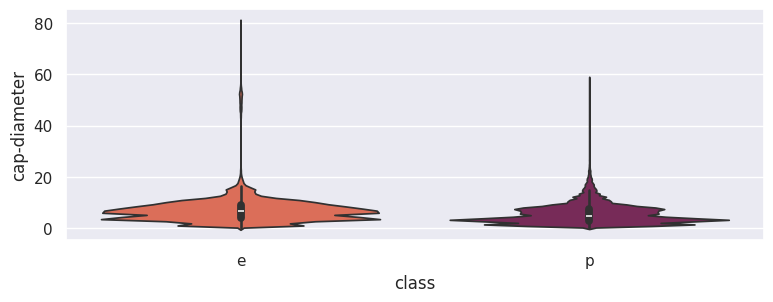

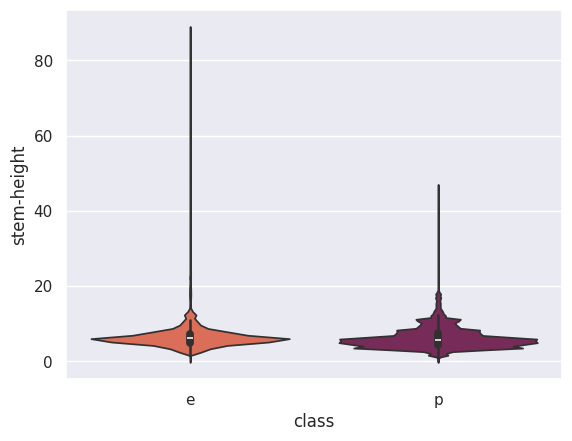

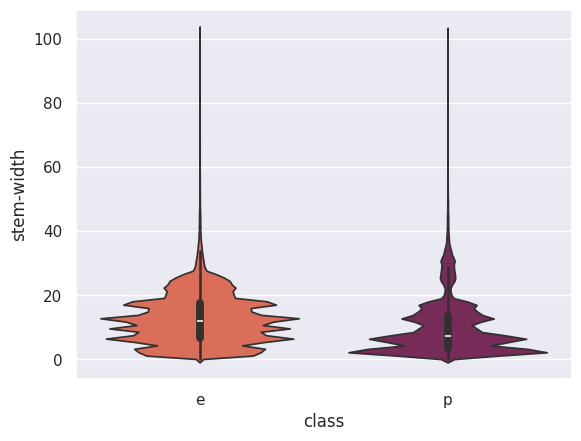


##############         Box Plot         #################



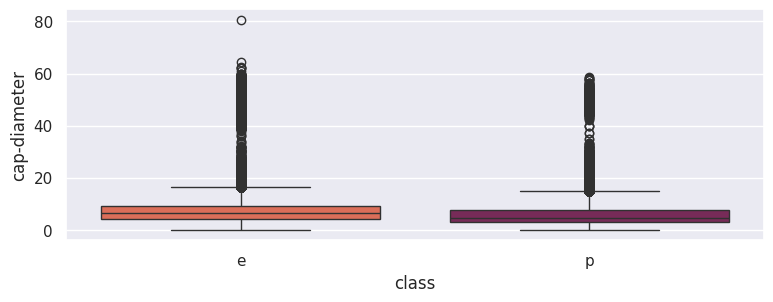

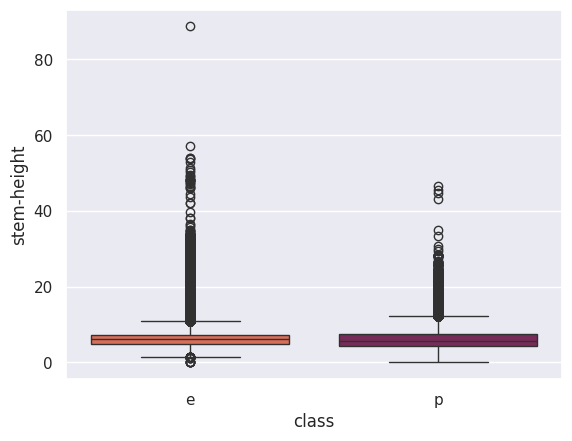

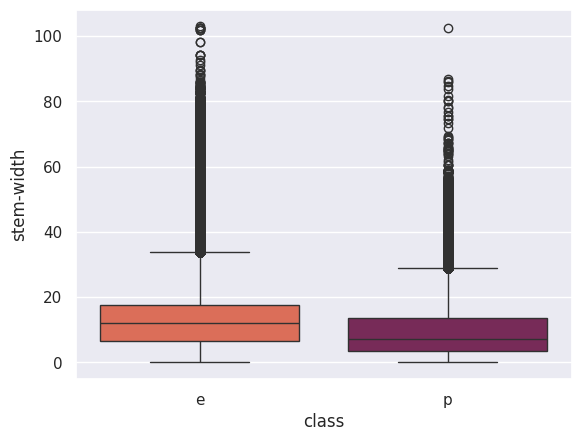


##############         Distribuição das Espécies         #################



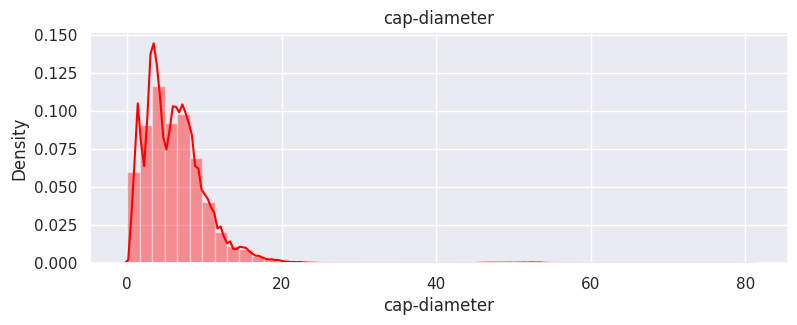

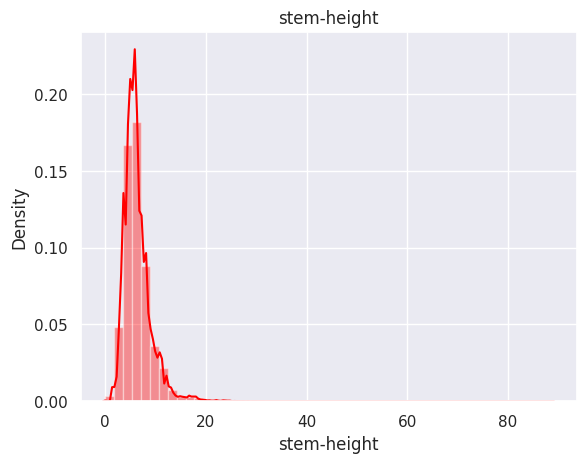

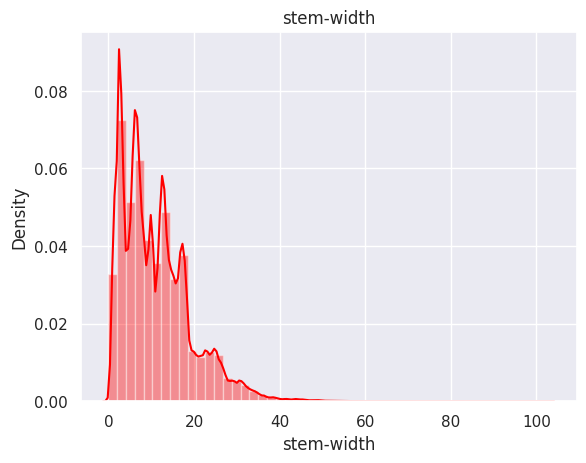

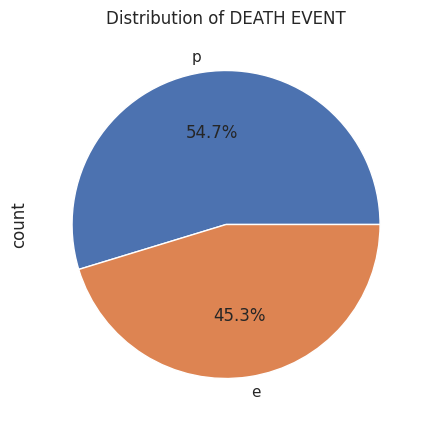

In [43]:
# %% [code]
#conjunto de ferramentas/funcoes de visualização da biblioteca sns
# CASO SEJA OUTRO DATSET trocar 'species' pelo rótulo da classe desejada no dataset


print("")
print("##############         Bar Plot         #################")
print("")

plt.figure(figsize = (9,3))
for n in numerical_list:
  sns.barplot(x = 'class', y = n, data = analysis_dataset, palette="cubehelix")
  plt.show()



print("")
print("##############         Violin Plot         #################")
print("")

plt.figure(figsize = (9,3))
for n in numerical_list:
  sns.barplot(x = 'class', y = n, data = analysis_dataset, palette="rocket_r")
  plt.show()


print("")
print("##############         Violin Plot         #################")
print("")

plt.figure(figsize = (9,3))
for n in numerical_list:
  sns.violinplot(x = 'class', y = n, data = analysis_dataset, palette="rocket_r")
  plt.show()

print("")
print("##############         Box Plot         #################")
print("")
plt.figure(figsize = (9,3))
for n in numerical_list:
  sns.boxplot(x = 'class', y = n, data = analysis_dataset, palette="rocket_r")
  plt.show()


print("")
print("##############         Distribuição das Espécies         #################")
print("")
# em barra
plt.figure(figsize = (9,3))
for n in numerical_list:
  try:
    sns.distplot(analysis_dataset[n], color="red").set_title(n)
  except:
    break
  plt.show()

# %% [code]
#em gráfico de pizza
plt.figure(1, figsize=(5,5))
plt.title("Distribution of DEATH EVENT")
analysis_dataset['class'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [45]:
analysis_dataset.isnull().mean() * 100

,0
class,0.000000
cap-diameter,0.000128
cap-shape,0.001283
cap-surface,21.528227
cap-color,0.000385
does-bruise-or-bleed,0.000257
gill-attachment,16.809280
gill-spacing,40.373988
gill-color,0.001829
stem-height,0.000000


In [11]:
dataset = dataset.sample(100000)

In [12]:
#separa entrada de saída desejada (rótulo/anotacao)
# TROCAR AQUI CASO SEJA OUTRO DATASET: n = 4 pq são 4 features de entrada, outro dataset podera ter outro numero de features de entrada
y = dataset.iloc[:,0:1].values
X = dataset.iloc[:,1:].values

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')


# %% [code]
#funcao split divide as amostras em conunto de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

# %% [markdown]
# Standardization é um método que transforma os dados de forma a se ter média zero e desvio padrão de 1 e a distribuição tende a ser normal. A fórmula envolve a subtração do valor médio seguida pela divisão pela variança.

# %% [code]
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


X shape: (100000, 19)
y shape: (100000, 1)
Total # of sample in whole dataset: 100000
Total # of sample in train dataset: 67000
Total # of sample in validation dataset: 16500
Total # of sample in test dataset: 16500


############################################################################
GaussianNB
Train score of trained model: 58.89104477611941
Validation score of trained model: 51.45454545454545
Test score of trained model: 59.07878787878788
 
Confussion Matrix: 
[[5713 4995]
 [1757 4035]]

Accuracy : 0.5907878787878788
Precision: 0.446843853820598
Recall   : 0.6966505524861878
F1 score : 0.5444609364458237
Specificity : 0.5335263354501307

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.53      0.63     10708
           1       0.45      0.70      0.54      5792

    accuracy                           0.59     16500
   macro avg       0.61      0.62      0.59     16500
weighted avg       0.65      0.59      0.60     16500



############################################################################



LogisticRegression
Train score of trained model: 64.54179104477612
Validation score of trained model: 44.6
Test score of trained

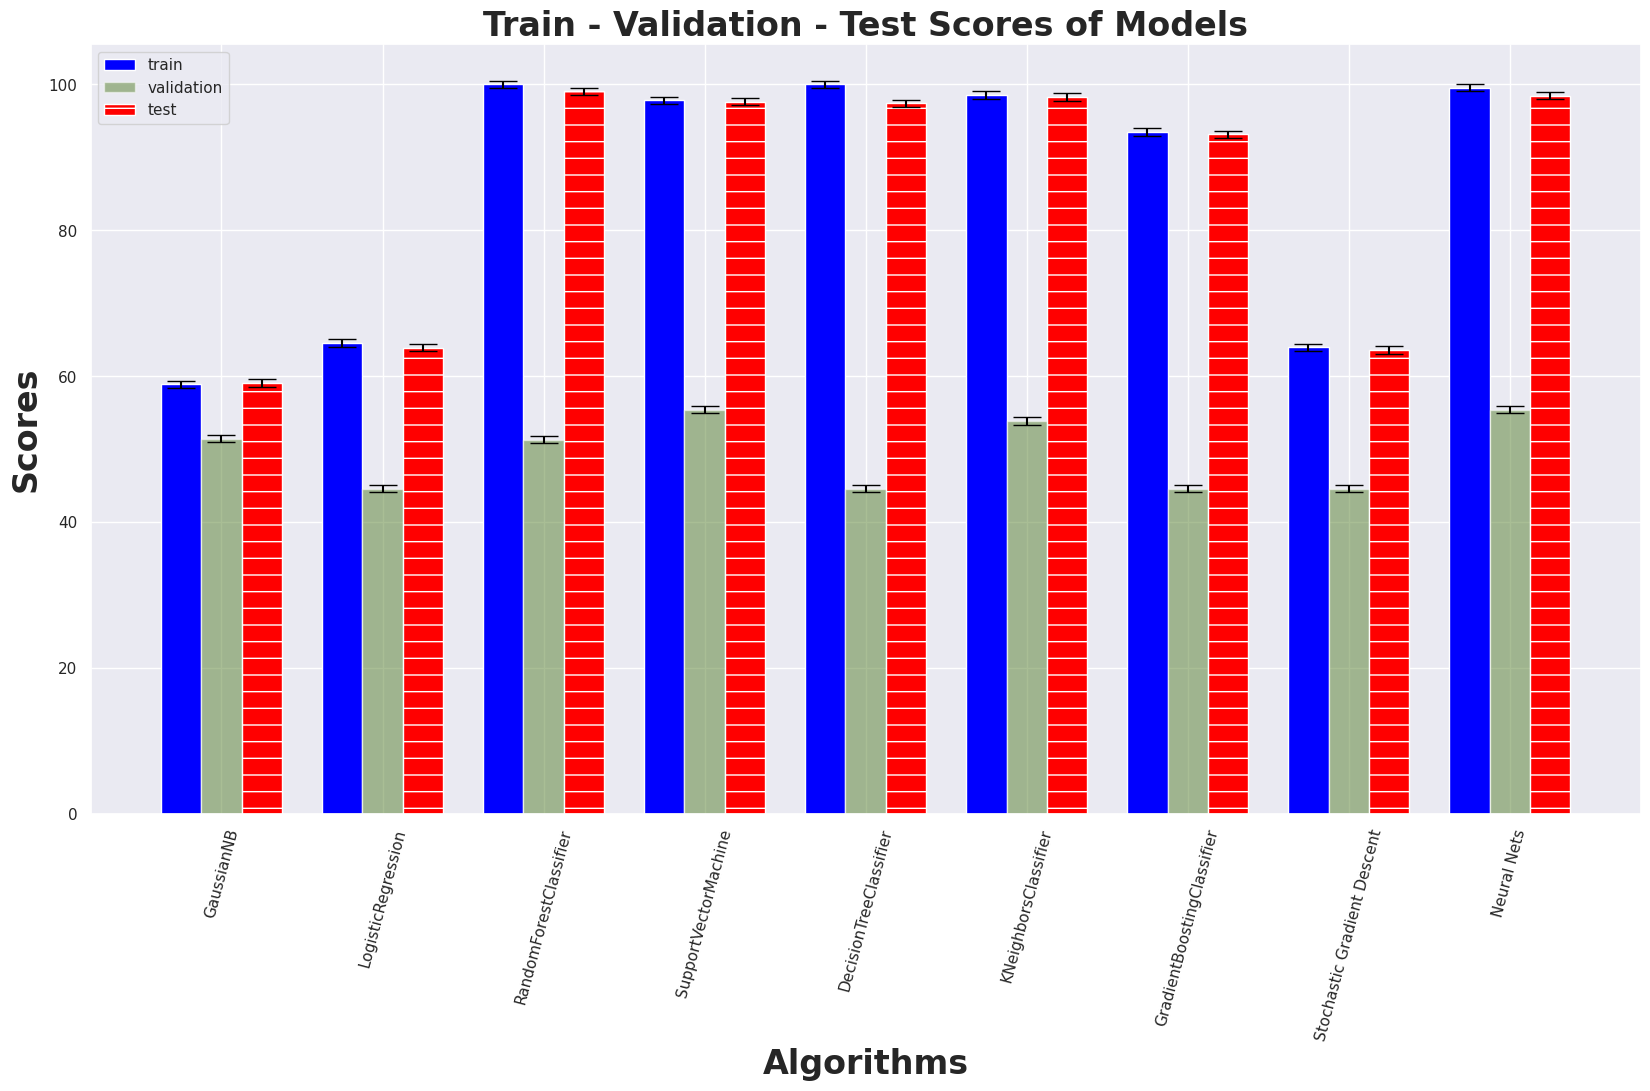

In [13]:
# %% [code]



# modelos escolhidos para realizar a classificacao (todos pertencem a biblioteca sklearn)
models = {
    'GaussianNB': GaussianNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
}

modelNames = ["GaussianNB",'LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']

trainScores = []
validationScores = []
testScores = []
print("############################################################################")

for m in models:
  model = models[m]
  #para cada modelo é realizada a sua parametrizacao (fit - aprendizado do modelo, com base nos dados de treinamento)
  model.fit(X_train, y_train)
  #score = model.score(X_valid, y_valid)
  #print(f'{m} validation score => {score*100}')

  #imprime score de treinamento [ara cada modelo (o quao acerta nos dados de treinamento)
  print(f'{m}')
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)

  #imprime score de validação para cada modelo (o quao acerta nos dados de treinamento)
  validation_score = model.score(X_valid, y_valid)
  print(f'Validation score of trained model: {validation_score*100}')
  validationScores.append(validation_score*100)

  #imprime score de treinamento [ara cada modelo (o quao acerta nos dados de treinamento)
  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")

  #faz predicao para dados de teste, e calcula a matriz de confusao
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

# tira fora
#  predictions = model.predict(X_test)
#  cm = confusion_matrix(predictions, y_test)

  #calcula falsos positivos, negativos, verdadeiros positivos e negativos a mao
  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  #calcula acurácia, precisao, recall, f1-score e especificidade
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall   : {recall}')
  print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  #utiliza funcao já pronta para calcular matriz de confusao
  print("")
  print(f'Classification Report: \n{classification_report(y_predictions, y_test)}\n')
  print("")

  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test)
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
  print("############################################################################")
  print("")
  print("")
  print("")

# %% [code]
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.title('Train - Validation - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25

bars1 = trainScores
bars2 = validationScores
bars3 = testScores

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='validation', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, hatch = '-')

modelNames = ["GaussianNB", 'LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']

plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)

plt.legend()
plt.show()

# %% [code]
for i in range(9):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')

In [15]:
# Removendo variáveis com alta porcentagem de incompletitude
dataset.drop("stem-root", axis=1, inplace=True)
dataset.drop("veil-color", axis=1, inplace=True)
dataset.drop("spore-print-color", axis=1, inplace=True)

############################################################################
GaussianNB
Train score of trained model: 58.89104477611941
Validation score of trained model: 51.45454545454545
Test score of trained model: 59.07878787878788
 
Confussion Matrix: 
[[5713 4995]
 [1757 4035]]

Accuracy : 0.5907878787878788
Precision: 0.446843853820598
Recall   : 0.6966505524861878
F1 score : 0.5444609364458237
Specificity : 0.5335263354501307

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.53      0.63     10708
           1       0.45      0.70      0.54      5792

    accuracy                           0.59     16500
   macro avg       0.61      0.62      0.59     16500
weighted avg       0.65      0.59      0.60     16500



############################################################################



LogisticRegression
Train score of trained model: 64.54179104477612
Validation score of trained model: 44.6
Test score of trained

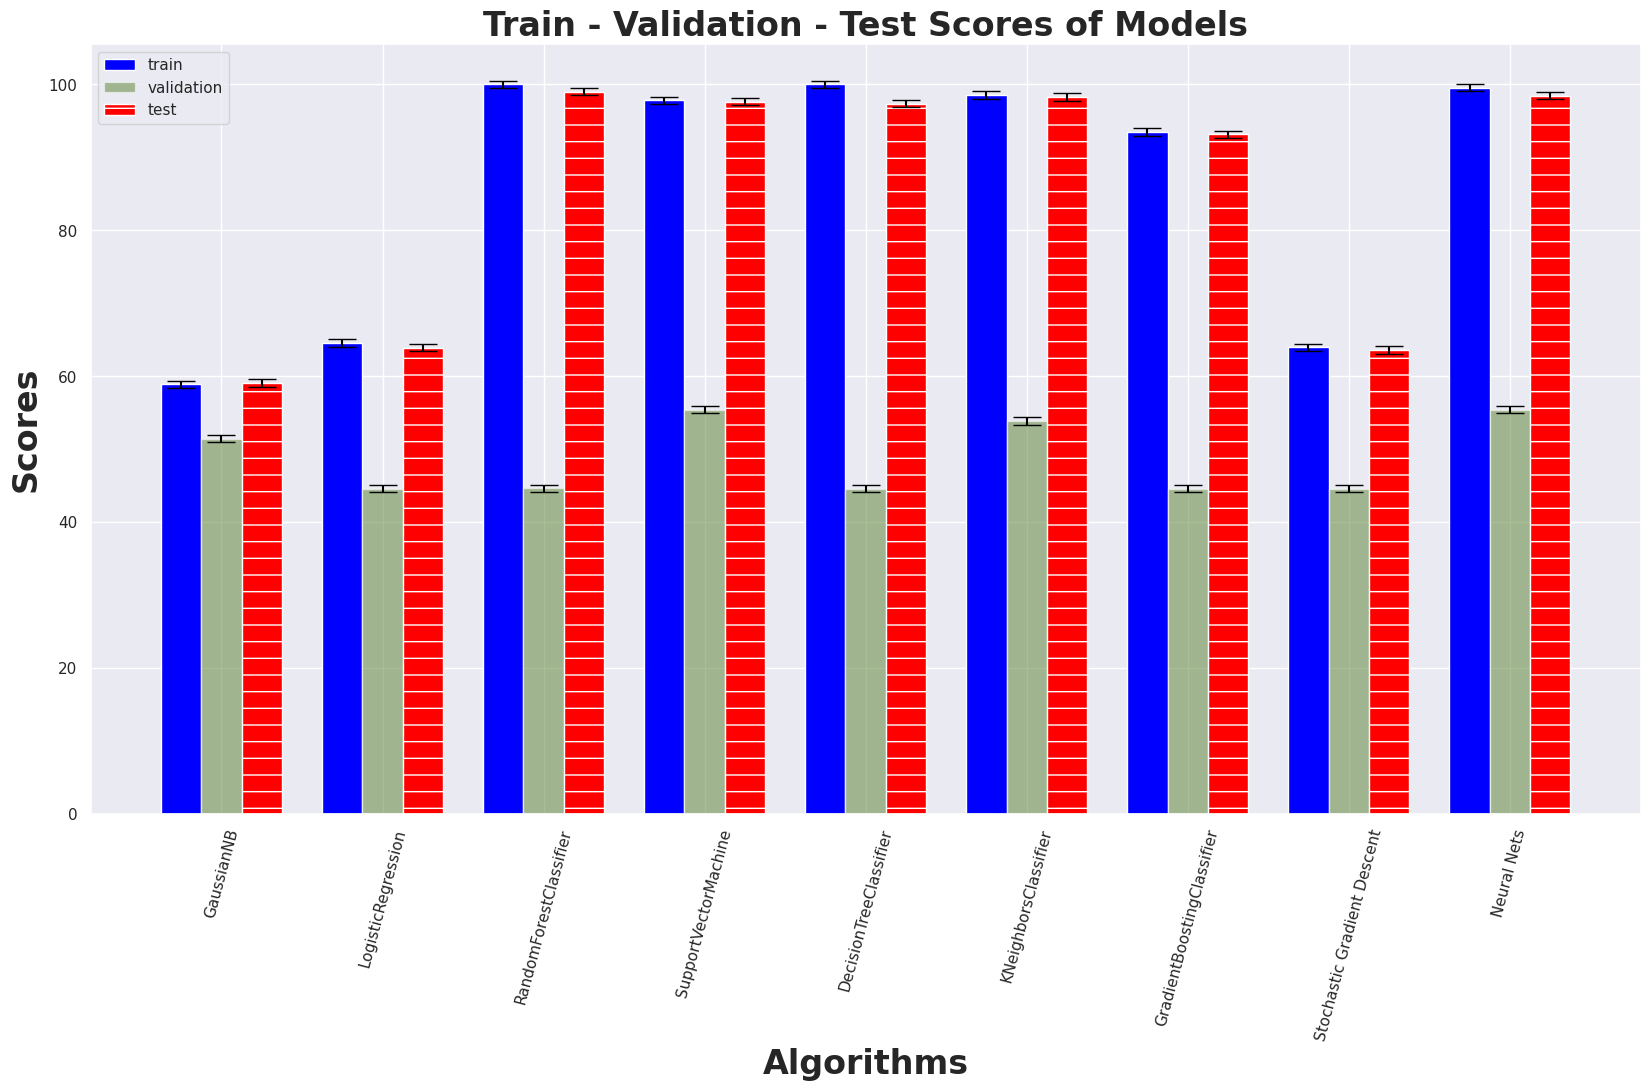

Accuracy of GaussianNB -----> 59.07878787878788
Accuracy of LogisticRegression -----> 63.8969696969697
Accuracy of RandomForestClassifier -----> 99.0121212121212
Accuracy of SupportVectorMachine -----> 97.63636363636363
Accuracy of DecisionTreeClassifier -----> 97.34545454545454
Accuracy of KNeighborsClassifier -----> 98.2909090909091
Accuracy of GradientBoostingClassifier -----> 93.14545454545454
Accuracy of Stochastic Gradient Descent -----> 63.60606060606061
Accuracy of Neural Nets -----> 98.44242424242424


In [16]:
# %% [code]



# modelos escolhidos para realizar a classificacao (todos pertencem a biblioteca sklearn)
models = {
    'GaussianNB': GaussianNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
}

modelNames = ["GaussianNB",'LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']

trainScores = []
validationScores = []
testScores = []
print("############################################################################")

for m in models:
  model = models[m]
  #para cada modelo é realizada a sua parametrizacao (fit - aprendizado do modelo, com base nos dados de treinamento)
  model.fit(X_train, y_train)
  #score = model.score(X_valid, y_valid)
  #print(f'{m} validation score => {score*100}')

  #imprime score de treinamento [ara cada modelo (o quao acerta nos dados de treinamento)
  print(f'{m}')
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)

  #imprime score de validação para cada modelo (o quao acerta nos dados de treinamento)
  validation_score = model.score(X_valid, y_valid)
  print(f'Validation score of trained model: {validation_score*100}')
  validationScores.append(validation_score*100)

  #imprime score de treinamento [ara cada modelo (o quao acerta nos dados de treinamento)
  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")

  #faz predicao para dados de teste, e calcula a matriz de confusao
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

# tira fora
#  predictions = model.predict(X_test)
#  cm = confusion_matrix(predictions, y_test)

  #calcula falsos positivos, negativos, verdadeiros positivos e negativos a mao
  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  #calcula acurácia, precisao, recall, f1-score e especificidade
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall   : {recall}')
  print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  #utiliza funcao já pronta para calcular matriz de confusao
  print("")
  print(f'Classification Report: \n{classification_report(y_predictions, y_test)}\n')
  print("")

  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test)
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
  print("############################################################################")
  print("")
  print("")
  print("")

# %% [code]
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.title('Train - Validation - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25

bars1 = trainScores
bars2 = validationScores
bars3 = testScores

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='validation', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, hatch = '-')

modelNames = ["GaussianNB", 'LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']

plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)

plt.legend()
plt.show()

# %% [code]
for i in range(9):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')